# Example1: Feed forward neural network (Multi-layer perceptron)

Classification problem - taking MNIST dataset

In [23]:
# 1. Loading the dataset

from keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
# 2. Preparing the data

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [25]:
# 3. Prepare the labels

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [26]:
# 4. The network architecture

from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Lets see the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 5. The compilation step

from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [28]:
# 6. Train the model

batch_size = 128
num_classes = 10
epochs = 10           # 20  

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 629us/step - loss: 0.2482 - acc: 0.9233 - val_loss: 0.1126 - val_acc: 0.9651
Epoch 2/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.1023 - acc: 0.9693 - val_loss: 0.0794 - val_acc: 0.9772
Epoch 3/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.0756 - acc: 0.9772 - val_loss: 0.0823 - val_acc: 0.9763
Epoch 4/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.0603 - acc: 0.9818 - val_loss: 0.0802 - val_acc: 0.9778
Epoch 5/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0837 - val_acc: 0.9779
Epoch 6/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0846 - val_acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.0396 - acc: 0.9878 - val_loss: 0.

In [30]:
# Lets plot the training and validation loss using the history object that was returned after model training

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history
#print(history_dict)

In [33]:
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

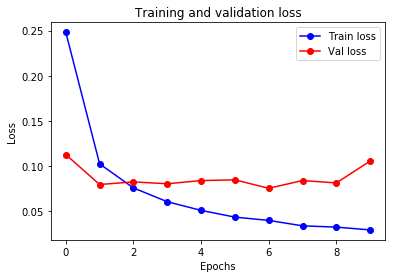

In [37]:
plt.plot(train_loss,'bo-',label='Train loss')
plt.plot(val_loss,'ro-',label='Val loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

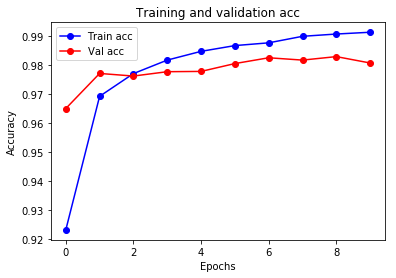

In [38]:
# Lets plot the training and validation accuracy

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(train_acc,'bo-',label='Train acc')
plt.plot(val_acc,'ro-',label='Val acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
# 7. Test the model performance on test data

test_loss,test_acc = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 0.10541826588929157
Test accuracy: 0.9808


# Example 2: Convolutional neural network on mnist dataset

In [41]:
# Code copied from
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10

epochs = 10        #12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [42]:
# Build the Convolutional neural network model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile and fit the model

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 342s 6ms/step - loss: 0.2643 - acc: 0.9181 - val_loss: 0.0578 - val_acc: 0.9811
Epoch 2/10
32128/60000 [===============>..............] - ETA: 2:31 - loss: 0.0979 - acc: 0.9717

In [ ]:
# Evaluate on the test data

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])